In [1]:
# required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
# generating data
from sklearn.datasets import make_classification
iv , dv = make_classification(n_samples= 4000 , n_features= 2 , n_clusters_per_class=1 , n_redundant = 0 , n_informative = 1 ,  weights=[.97]  )
iv_train  = iv[-2000:] 
dv_train  = dv[-2000:]
iv_test   = iv[:-2000]
dv_test   = dv[:-2000]

In [3]:
# implementing logistic regression 

from sklearn import linear_model
lm = linear_model.LogisticRegression(class_weight={ 1: .95 , 0: .05 })
lm.fit(iv_train, dv_train)
dv_train_pred = lm.predict(iv_train)
dv_test_pred = lm.predict(iv_test)

In [4]:
# logistic model result 

spam                 = dv_test[dv_test==1] 
pred_spam            = dv_test_pred[dv_test==1] 
correct_pred_spam    = (spam ==  pred_spam ).sum()
print ( correct_pred_spam , spam.shape[0] )

NOTspam              = dv_test[dv_test==0] 
pred_NOTspam         = dv_test_pred[dv_test==0] 
correct_pred_NOTspam = (NOTspam ==  pred_NOTspam ).sum()
print (correct_pred_NOTspam  , NOTspam.shape[0] )



47 70
1812 1930


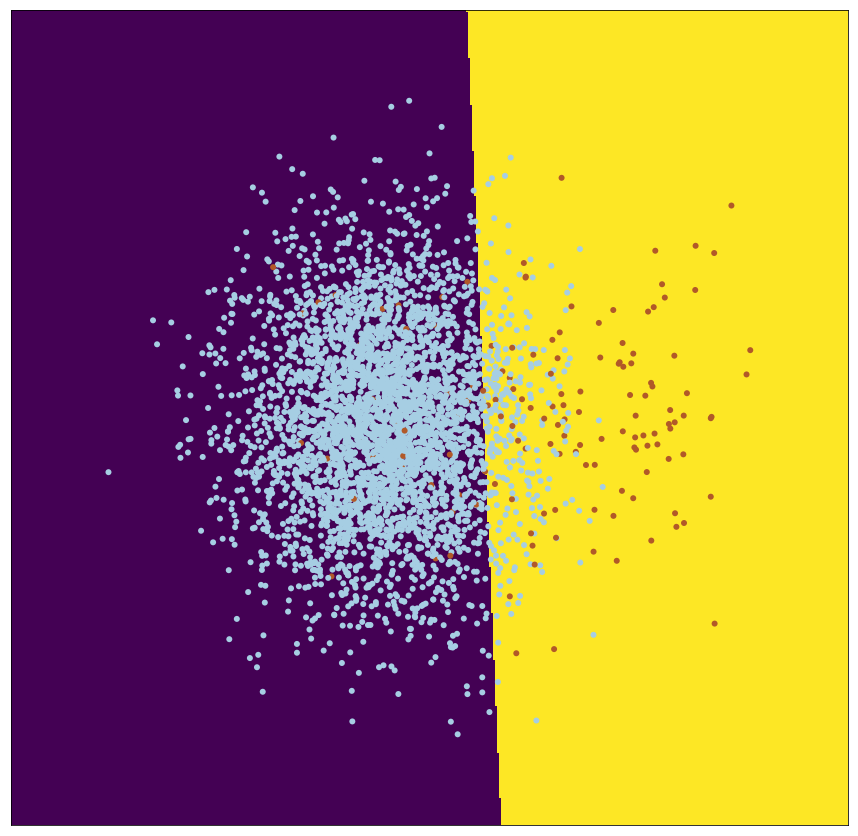

In [5]:
plt.figure(figsize=(15 , 15 ))
h = .02 # step size in the mesh
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = iv[:, 0].min() - 1, iv[:, 0].max() + 1
y_min, y_max = iv[:, 1].min() - 1, iv[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))
Z = lm.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='viridis')
# Plot also the training points
plt.scatter(iv[:, 0], iv[:, 1], c=dv, edgecolors='k', linewidth=0, cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()
